# Exploring the Impact of Chemical Features on the Sensory Quality of Red Wine: Insights and Implications

## Link to video

https://drive.google.com/file/d/1a2CoecrFq5iUbh_InSDiQuhP7k7Ho6Ip/view?usp=sharing
## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

This study aimed to investigate how different chemical qualities in red wine affect its overall quality. The study will analyze a dataset containing information on various physicochemical tests and sensory data on red wine. The dataset contains 1,599 observations and includes input variables such as fixed acidity, volatile acidity, citric acid, residual sugar, chloride, free sulfur dioxide, total sulfur dioxide, density, pH, sulfate, and alcohol. The output variable is the quality score, which ranges from 0 to 10 and represents the perceived quality of the wine.

The study will analyze the dataset using various statistical and machine learning techniques to gain insight into the relationship between chemical quality and wine quality. The analysis will include data visualization, correlation analysis and hypothesis testing to identify important factors affecting wine quality.

# Names

- Zachary Carolino
- Rufeng Chen
- Blake Currier
- Rita Fischer

<a id='research_question'></a>
# Research Question

How do differing chemical qualities in red wine affect overall quality?

<a id='background'></a>

## Background & Prior Work

Previous research has explored the relationship between chemical quality and wine quality. Several studies have shown that certain chemical components, such as acidity, alcohol content and sulfates, can significantly affect the perceived quality of red wine. Other research has focused on specific compounds (such as citric acid) and their effect on freshness and flavor.

The study builds on previous work by utilizing a comprehensive dataset including multiple chemical properties and their corresponding quality ratings. By analyzing this dataset, the study aimed to gain a more complete understanding of how different chemical qualities work together to affect the overall quality of red wine.

References (include links):
- 1)https://archive.ics.uci.edu/ml/datasets/wine+quality
- 2)https://bkwinery.com/wine-tasting-guide#:~:text=There%20are%20three%20things%20to,that%20you're%20dealing%20with.

# Hypothesis


The main aim of our study was to investigate and analyze the relationship between a comprehensive set of chemical features found in red wine and their effects on sensory quality. We hypothesized that each individual chemical component present in the dataset would have a distinct effect on the overall sensory attributes of red wine.

# Dataset(s)

- Dataset Name: Red Wine Quality
- Link to the dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/download?datasetVersionNumber=2
- Number of observations: 1599

Input variables (physicochemical tests):

* *Fixed acidity: Represents the fixed (non-volatile) acids in the wine.*
* *Volatile acidity: Measures the amount of acetic acid in the wine, which can contribute to vinegar-like flavors.*
* *Citric acid: Indicates the presence of citric acid, which can add freshness and flavor to the wine.*
* *Residual sugar: Represents the amount of sugar remaining after fermentation.*
* *Chlorides: Measures the amount of salt in the wine, which can impact taste and balance.*
* *Free sulfur dioxide: Represents the free form of sulfur dioxide, which acts as a preservative and antimicrobial agent.*
* *Total sulfur dioxide: Measures the total amount of both free and bound forms of sulfur dioxide.*
* *Density: Represents the density of the wine, which is related to the alcohol content and residual sugar.*
* *pH: Indicates the acidity or alkalinity of the wine on a scale of 0 to 14.*
* *Sulphates: Measures the presence of sulfur dioxide, which is important for wine stability and preservation.*
* *Alcohol: Represents the alcohol content of the wine.*

Output variable (sensory data):

* *Quality: Represents a sensory evaluation score given to the wine, ranging from 0 to 10, indicating the perceived quality of the wine. Higher scores indicate better quality.*

We chose this data set since it will provide us with all the necessary factors needed to form a good idea on how chemical factors affect the quality of red wine. 

# Setup

In [17]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from scipy.stats import ttest_ind

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
# Read data
data = pd.read_csv('winequality-red.csv')

In [3]:
# Display the shape of the DataFrame
data.shape

(1599, 12)

In [4]:
# Display the first few rows of the DataFrame
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Statistical summary of the dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Cleaning

There is no missing value, so we don't need to clean.

In [7]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Data Analysis

## 1. Data Overview

The dataset provided here contains information on various chemical qualities of red wine, including fixed acidity, volatile acidity, citric acid, residual, sugar, other chemical qualities, as well as alcohol content and overall quality. As it stands, the data set consists of 1,599 entries. In regards to our data, it provides several values that assist us in finding which of these differing chemical qualities affect the overall perceived quality of red wine. As such, our analysis caused us to observe the following patterns. 

In [8]:
#Reccording to the data description, we set wines with quality > 6.5 as 'good' wines
data['rating'] = pd.cut(data['quality'], bins = (2, 6.5, 8), labels = ['bad', 'good'])

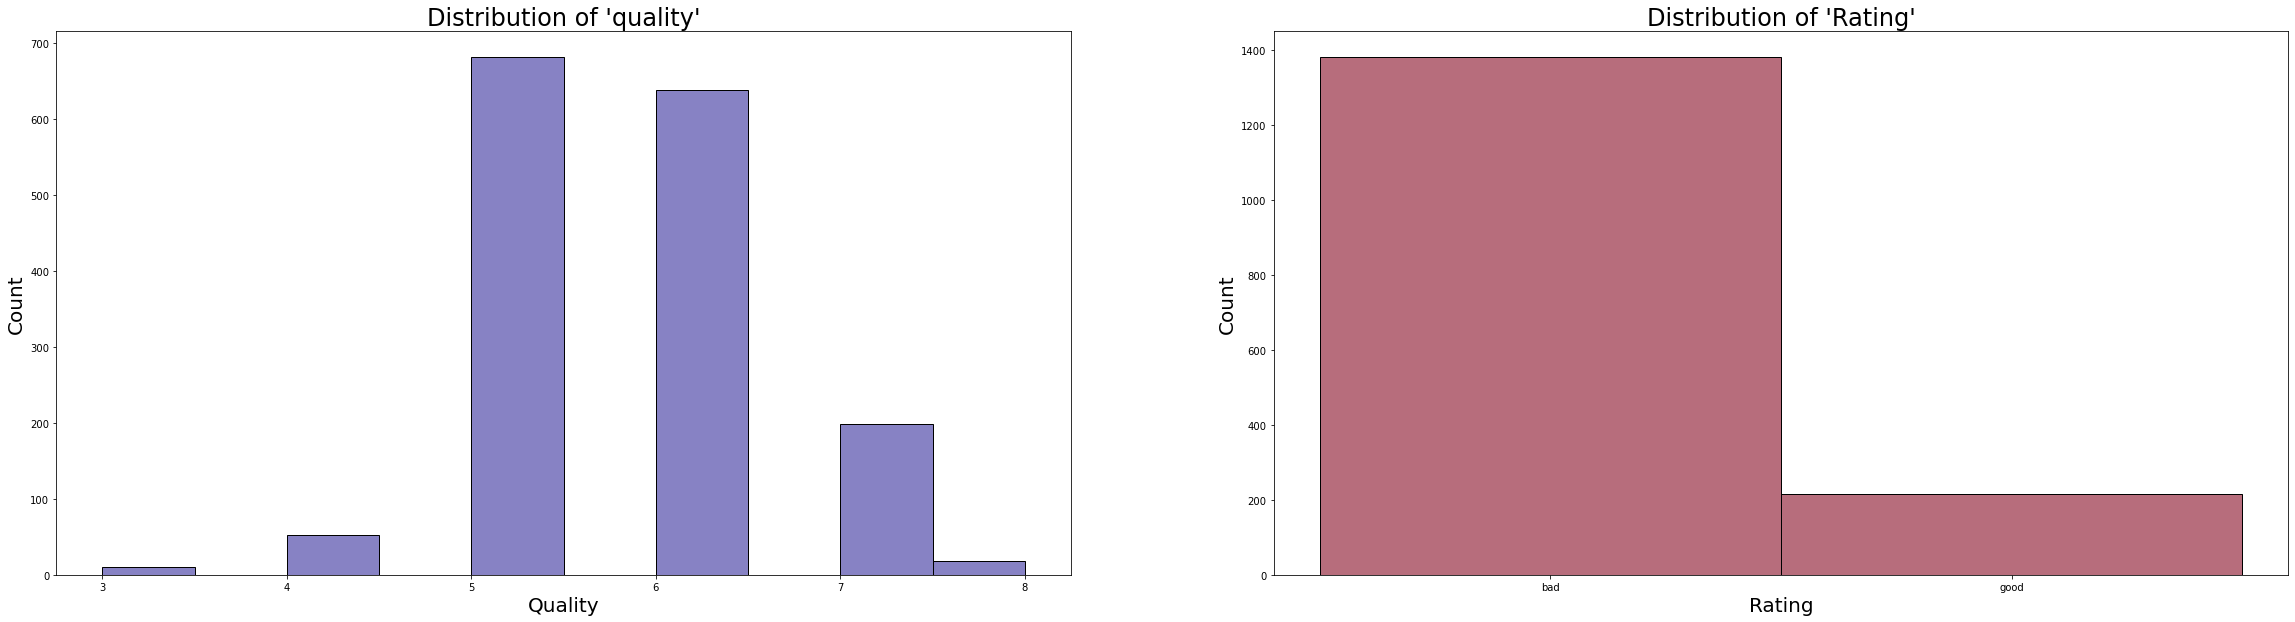

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(40, 10))

custom_cmap = cm.get_cmap("twilight")

sns.histplot(ax=axes[0], x=data['quality'], bins=10, color=custom_cmap(0.3)).set(title="Distribution of 'quality'")
axes[0].set_title("Distribution of 'quality'", fontsize=24)
axes[0].set_xlabel("Quality", fontsize=20)
axes[0].set_ylabel("Count", fontsize=20)

sns.histplot(ax=axes[1], x=data['rating'], bins=10, color=custom_cmap(0.7)).set(title="Distribution of 'Rating'")
axes[1].set_title("Distribution of 'Rating'", fontsize=24)
axes[1].set_xlabel("Rating", fontsize=20)
axes[1].set_ylabel("Count", fontsize=20)

plt.show()

Overall, the quality of the wine ranges from 3 to 8 with a mean of 5.64. Taking that into account, we also find through our heat map, as well as our pair plot that sulfur dioxide (antioxidants), as well as acidity (sourness) have a strong positive correlation with overall quality. Additionally, alcohol content, chlorides (saltiness), citric acid (freshness) and sulfates (aromas) had a positive correlation with quality, albeit to a lesser extent. 

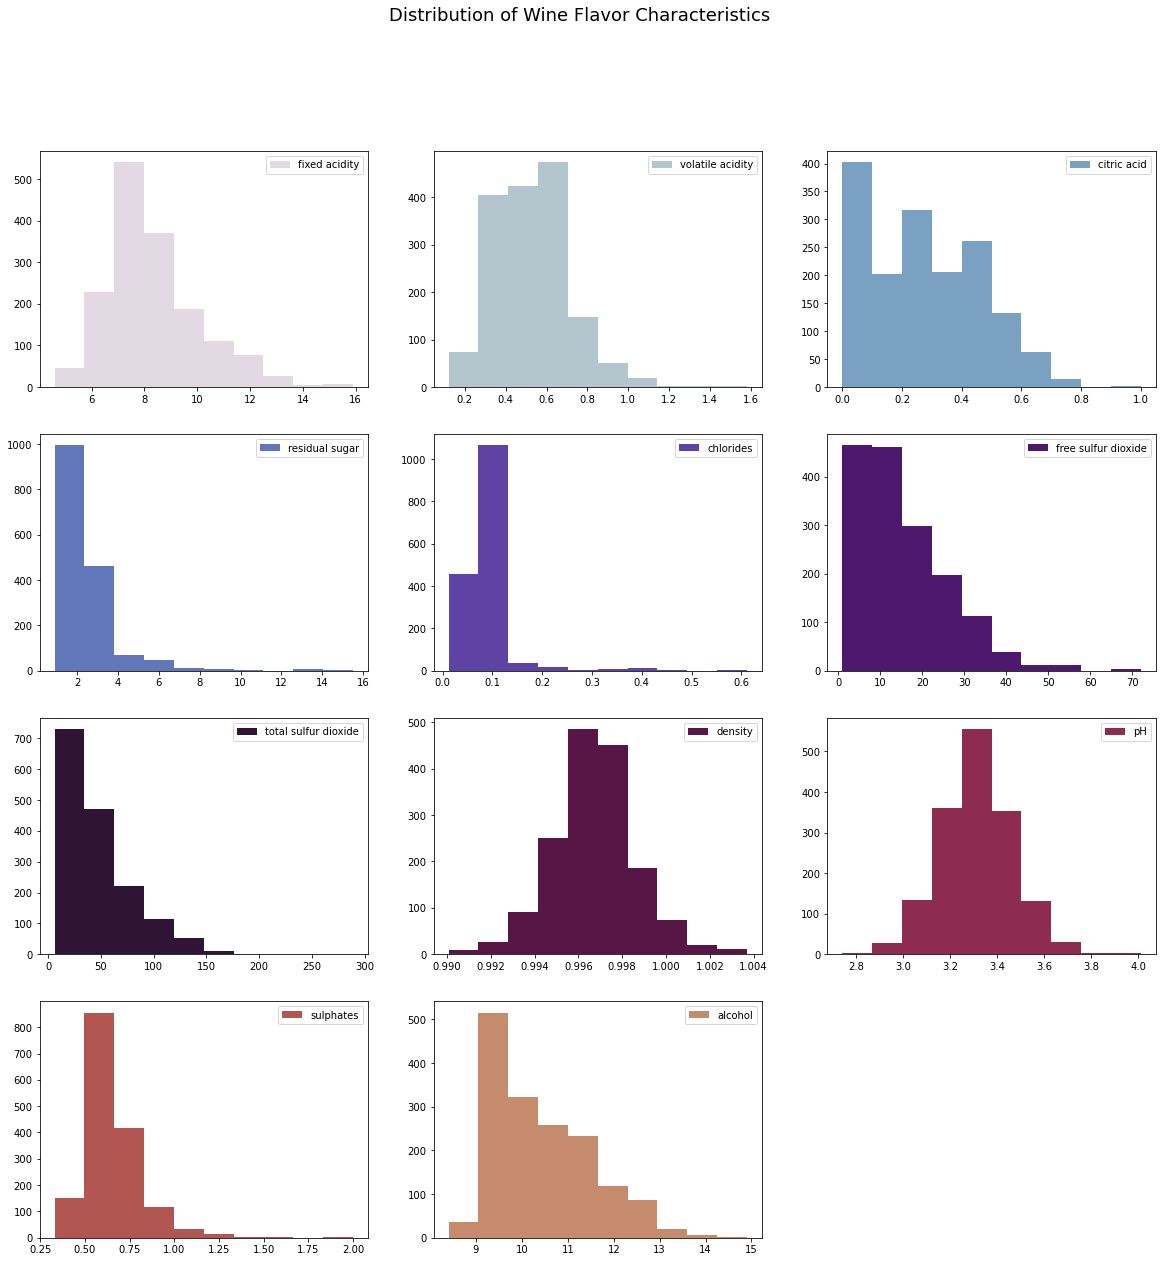

In [10]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))
axes[-1, -1].remove()

for index, column in enumerate(data.columns):
    if index < 12:
        ax = axes.flatten()[index]
        ax.hist(data[column], color = custom_cmap(index/12), label = column)
        ax.legend(loc = "best")
plt.suptitle("Distribution of Wine Flavor Characteristics", size = 18)

plt.show()

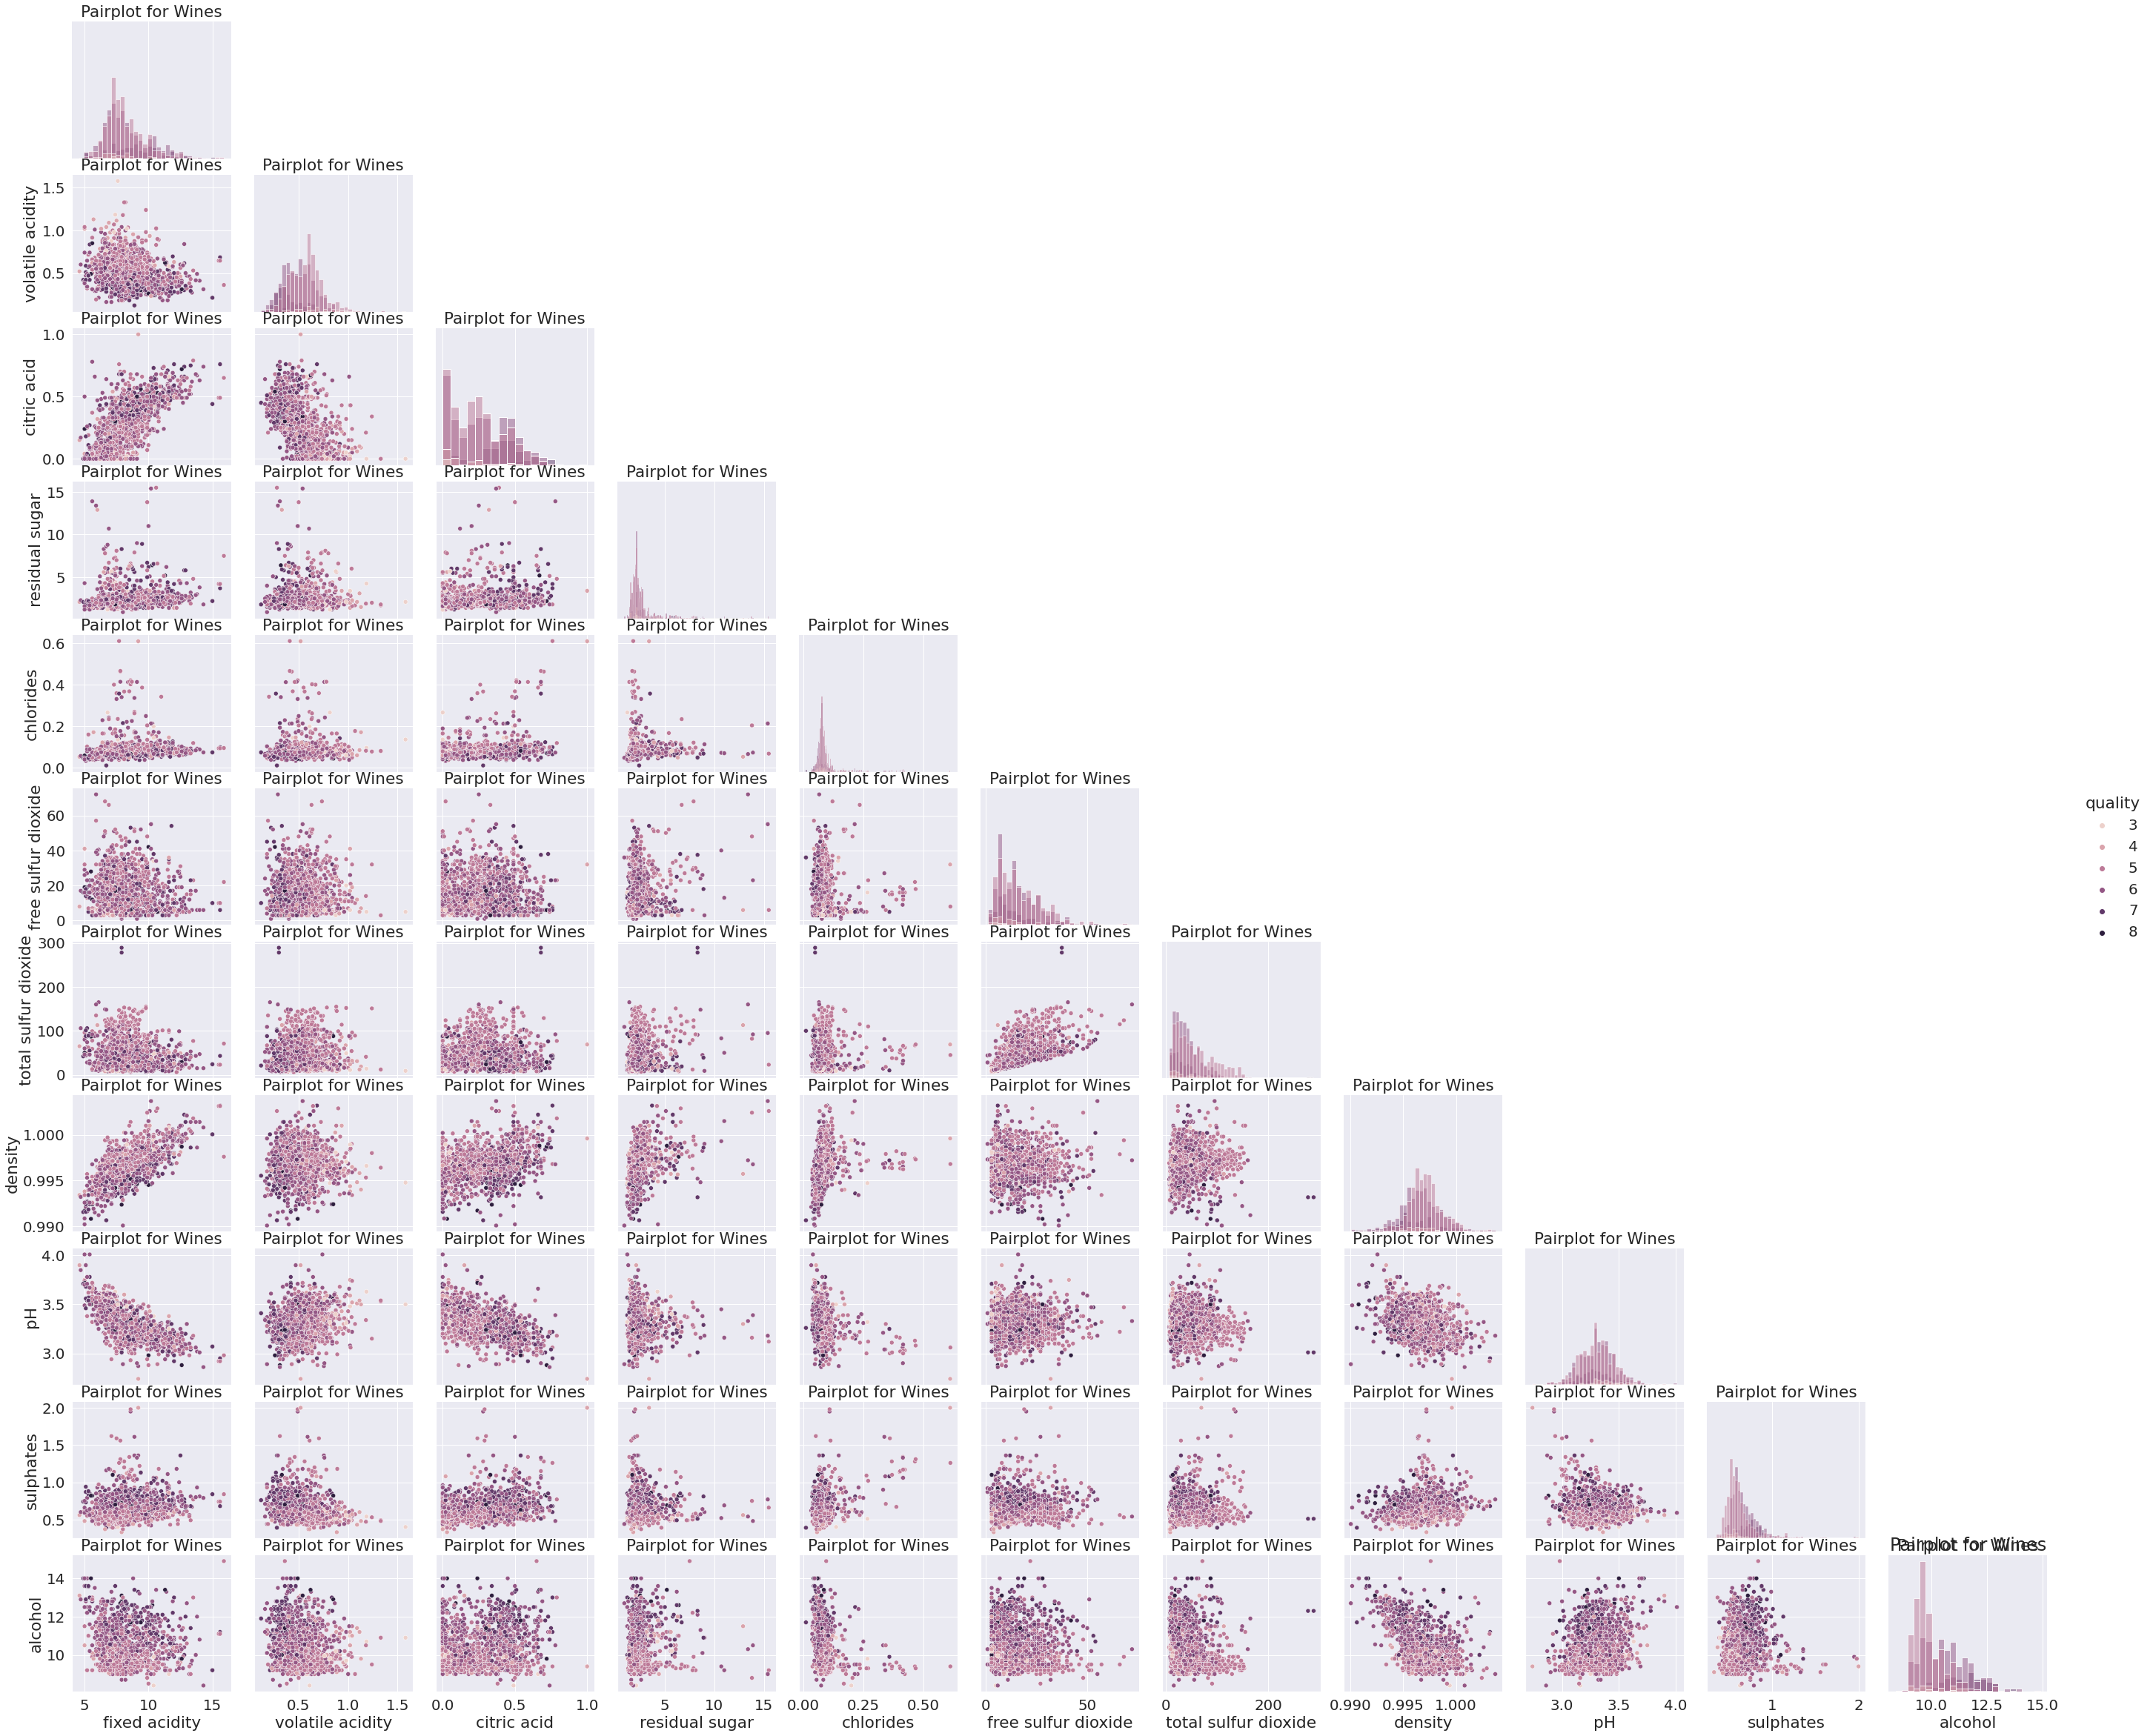

In [11]:
sns.set(font_scale=1.8)

sns.pairplot(data, diag_kind="hist", hue="quality", height=3, aspect=1.2, corner=True).set(title="Pairplot for Wines")
plt.title("Pairplot for Wines", fontsize=24)

plt.show()

/tmp/ipykernel_175/3173169376.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, linewidths = 2, cmap = "twilight").set(title = "Correlation between variables");


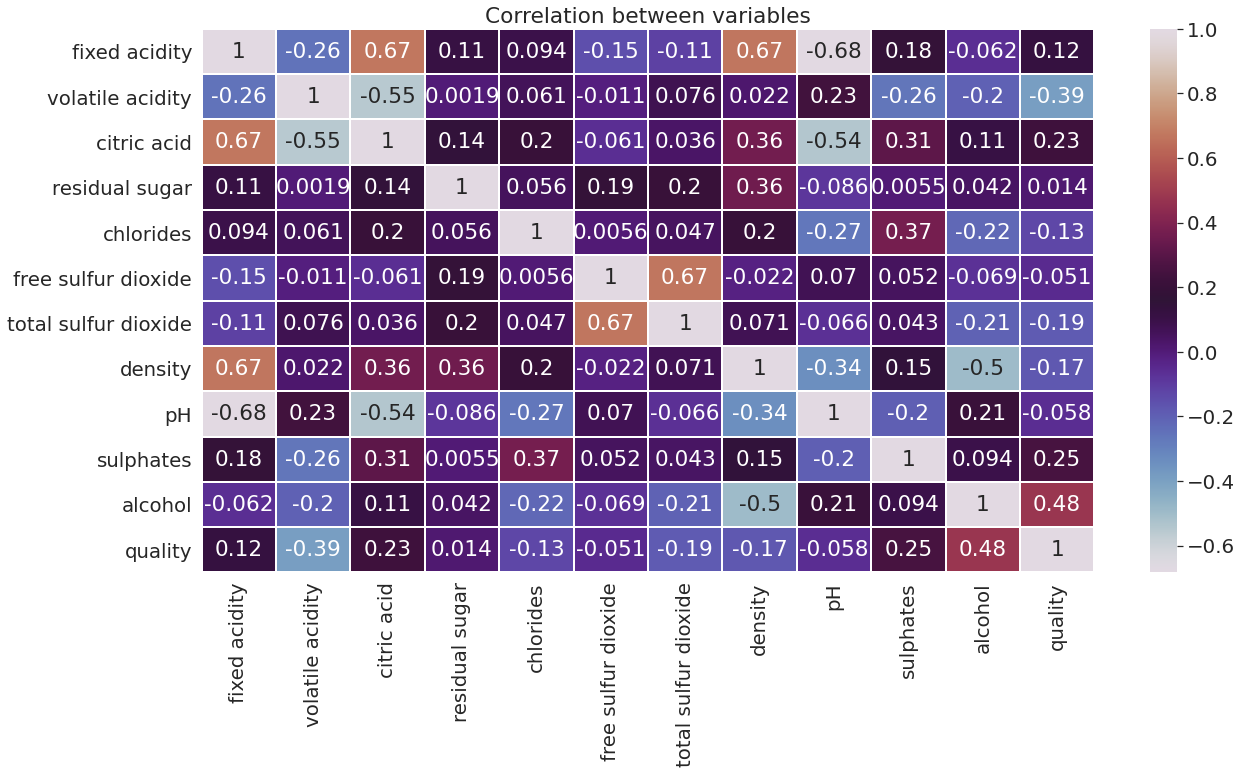

In [12]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(data.corr(), annot = True, linewidths = 2, cmap = "twilight").set(title = "Correlation between variables");

In [15]:
correlation = data.corr()['quality'].drop('quality').sort_values(ascending=False)
print(correlation)

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


/tmp/ipykernel_175/3290757043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()['quality'].drop('quality').sort_values(ascending=False)


First, fixed acidity averaged 8.13, with volatile acidity, which contributes to the wine’s sensory characteristics, indicating an average value of 0.53. These characteristics’ distributions were found to have a positive skew.

Citric acid, with a mean of 0.23 is a desirable characteristic that adds freshness. Additionally, residual sugar (sweetness), as well as chlorides (saltiness) affect any given red wine’s flavors as such. Furthermore, sulfur dioxide values indicate the amounts of antioxidants inside red wine. All of these characteristics also appeared to be positively skewed, in addition to alcohol content (measured in %AbV).

We also found that several characteristics had a Gaussian (Normal) distribution, which includes density, as well as pH.

Overall, the quality of the wine ranges from 3 to 8 with a mean of 5.64. Taking that into account, we also find through our heat map, as well as our pair plot that sulfur dioxide (antioxidants), as well as acidity (sourness) have a strong negative correlation with overall quality. Additionally, alcohol content, citric acid (freshness) and sulfates (aromas) had a positive correlation with quality. 


## 2. Hypothesis Testing for Characteristics

Next, we can perform hypothesis testing to determine if there are significant differences in the overall quality ratings based on different levels of each chemical quality. This will help us validate or reject the initial hypotheses and identify the chemical qualities that have a significant impact on the perceived quality.

In [19]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for feature in features:
    high_group = data[data[feature] > data[feature].median()]
    low_group = data[data[feature] <= data[feature].median()]

    t_stat, p_value = ttest_ind(high_group['quality'], low_group['quality'])
    print(f"T-test results for '{feature}':")
    print("T-statistic:", t_stat)
    print("p-value:", p_value)
    print("-------------------------------------------")

T-test results for 'fixed acidity':
T-statistic: 4.234281304854521
p-value: 2.423500954414717e-05
-------------------------------------------
T-test results for 'volatile acidity':
T-statistic: -12.955317739059026
p-value: 1.4232768243922547e-36
-------------------------------------------
T-test results for 'citric acid':
T-statistic: 10.588006531762087
p-value: 2.2959220331461033e-25
-------------------------------------------
T-test results for 'residual sugar':
T-statistic: 1.5954787953938685
p-value: 0.11080306592967219
-------------------------------------------
T-test results for 'chlorides':
T-statistic: -6.5307431302445424
p-value: 8.771011908788004e-11
-------------------------------------------
T-test results for 'free sulfur dioxide':
T-statistic: -1.9823928477496138
p-value: 0.04760643127469901
-------------------------------------------
T-test results for 'total sulfur dioxide':
T-statistic: -5.775832609643057
p-value: 9.186233391977202e-09
--------------------------------

The t-test results provide insights into the relationship between each feature and the quality of red wine. From the analysis, we can conclude that certain attributes have a significant impact on the perceived quality of red wine. These include fixed acidity, volatile acidity, citric acid, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates, and alcohol.

The findings suggest that variations in these attributes can lead to noticeable differences in the quality of red wine. For example, higher levels of fixed acidity, volatile acidity, and chlorides are associated with lower quality, while higher levels of citric acid, free sulfur dioxide, total sulfur dioxide, density, sulphates, and alcohol are linked to higher quality.

On the other hand, the results indicate that residual sugar and pH do not have a statistically significant effect on the perceived quality of red wine. This suggests that within the observed range of these attributes, their impact on wine quality is relatively minimal.

## 3. Feature Importance Analysis

To assess the importance of each chemical quality in predicting the overall quality of red wine, we can use random forests to provide a measure of the relative importance of each variable.

In [21]:
X = data.drop(['quality', 'rating'], axis=1)
y = data['rating']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)

                 Feature  Importance
10               alcohol    0.168133
9              sulphates    0.117851
1       volatile acidity    0.112176
7                density    0.097678
2            citric acid    0.093253
0          fixed acidity    0.079449
6   total sulfur dioxide    0.075579
4              chlorides    0.073005
3         residual sugar    0.068523
8                     pH    0.057949
5    free sulfur dioxide    0.056405


The results indicate that 'alcohol' is the most important feature for predicting the overall quality of red wine, with an importance value of 0.168133. This suggests that the alcohol content has a significant influence on the perceived quality. Following 'alcohol', the next important features are 'sulphates' (0.117851) and 'volatile acidity' (0.112176), indicating their considerable impact on wine quality.

Other features also contribute to the prediction, but to a lesser extent compared to the top three features.

This result corresponds to our previous analysis results.

# Prediction

In this part, our goal is to classify the quality of wine based on a dataset containing various chemical properties of wine.

We employ three popular classification algorithms to predict wine quality ratings: K nearest neighbors (KNN), boosting, and random forests. These algorithms are widely used for classification tasks and are known for their ability to handle complex datasets and make accurate predictions.

We split the dataset into training and testing sets to evaluate its performance.

For each algorithm, we tune hyperparameters using cross-validation techniques to optimize its performance. We train models on the training set and evaluate their performance on the test set using various evaluation metrics such as accuracy, precision, recall, and F1-score.

In [34]:
#split data to train and test
y = data["rating"]
x = data.drop("quality", axis = 1).drop("rating", axis = 1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.25, shuffle = True, random_state = 1)

In [35]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1144,7.3,0.320,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5
399,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0
...,...,...,...,...,...,...,...,...,...,...,...
715,7.2,0.490,0.18,2.7,0.069,13.0,34.0,0.99670,3.29,0.48,9.2
905,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8
235,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0


Since the features in the dataset have different sets of numbers, we should normalize the features in order to ensure weight balance.

In [36]:
scaler = MinMaxScaler()

x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.fit_transform(x_test)

In [37]:
x_train_normalized

array([[0.23893805, 0.1369863 , 0.23      , ..., 0.54330709, 0.17365269,
        0.26153846],
       [0.32743363, 0.38013699, 0.26      , ..., 0.4488189 , 0.11976048,
        0.12307692],
       [0.69911504, 0.17808219, 0.6       , ..., 0.28346457, 0.23952096,
        0.32307692],
       ...,
       [0.17699115, 0.41438356, 0.09      , ..., 0.48031496, 0.09580838,
        0.36923077],
       [0.2300885 , 0.34931507, 0.        , ..., 0.49606299, 0.1497006 ,
        0.09230769],
       [0.39823009, 0.19178082, 0.5       , ..., 0.37007874, 0.21556886,
        0.63076923]])

### K nearest neighbors classification

In [50]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = model_selection.GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(x_train_normalized, y_train)

best_knn = grid_search.best_estimator_

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       355
           1       0.44      0.36      0.40        45

    accuracy                           0.88       400
   macro avg       0.68      0.65      0.66       400
weighted avg       0.87      0.88      0.87       400

ROC AUC Score: 0.6496087636932708


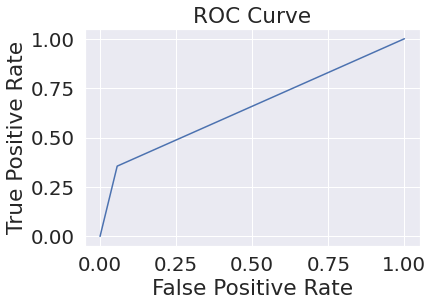

In [57]:
y_pred = best_knn.predict(x_test_normalized)

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

report = classification_report(y_test_encoded, y_pred_encoded)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_encoded)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### AdaBoost Classification

In [61]:
adaboost = AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

In [62]:
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
grid_search.fit(x_train_normalized, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       355
           1       0.42      0.47      0.44        45

    accuracy                           0.87       400
   macro avg       0.68      0.69      0.68       400
weighted avg       0.87      0.87      0.87       400

ROC AUC Score: 0.6924882629107981


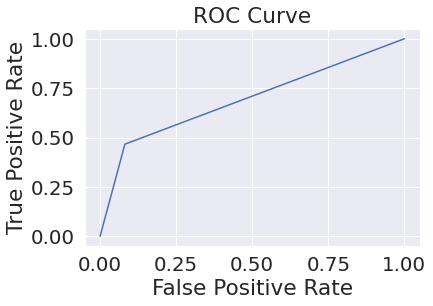

In [63]:
best_adaboost = grid_search.best_estimator_

y_pred = best_adaboost.predict(x_test_normalized)

y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

report = classification_report(y_test_encoded, y_pred_encoded)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_encoded)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Random Forest Classification

In [53]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [54]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train_normalized, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.93       355
           1       0.43      0.20      0.27        45

    accuracy                           0.88       400
   macro avg       0.67      0.58      0.60       400
weighted avg       0.85      0.88      0.86       400

ROC AUC Score: 0.5830985915492958


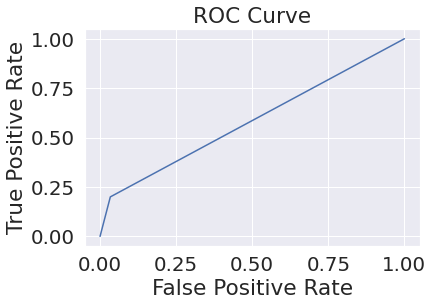

In [58]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test_normalized)

y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

report = classification_report(y_test_encoded, y_pred_encoded)
print("Classification Report:\n", report)

roc_auc = roc_auc_score(y_test_encoded, y_pred_encoded)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_encoded)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

Based on the classification reports and ROC AUC scores, we can summarize the performance of the three models as follows:

K nearest neighbors (KNN):
Accuracy: 88%
Accuracy: Class 0 (91%), Class 1 (43%)
Recalls: Class 0 (97%), Class 1 (20%)
F1 Score: Level 0 (0.93), Level 1 (0.27)
ROC AUC score: 0.58

Adaptive Boost:
Accuracy: 87%
Accuracy: Class 0 (93%), Class 1 (42%)
Recalls: Class 0 (92%), Class 1 (47%)
F1 Score: Level 0 (0.92), Level 1 (0.44)
ROC AUC score: 0.69

Random Forest (RF):
Accuracy: 88%
Accuracy: Class 0 (91%), Class 1 (43%)
Recalls: Class 0 (97%), Class 1 (20%)
F1 Score: Level 0 (0.93), Level 1 (0.27)
ROC AUC score: 0.58

In terms of accuracy, KNN, Adaboost, and Random Forest achieve similar performance, with accuracy around 87-88%. However, when examining precision, recall, and F1 scores, Adaboost outperformed the other two models in predicting class 1 ('good'), and Adaboost achieved a higher ROC AUC score (0.69), indicating that class have better discrimination.

We notice that all three models perform poorly on predicting class 1. We believe this is due to too few data points for 'good'. As shown in the data analysis section, the dataset has less than 300 red wines labeled 'good'.

# Ethics & Privacy

As the research was based on publicly available datasets from Kaggle, all data was anonymized to ensure privacy and reputation concerns of tasters and wineries would not be compromised.

# Conclusion & Discussion

In summary, our findings suggest that chemical profiles (especially alcohol, sulfates and volatile acidity) in red wine can significantly affect consumers' sensory experience. Our statistical analysis and predictive models revealed correlations between specific chemical signatures and sensory qualities. These findings contribute to a better understanding of the factors that influence the enjoyment and perception of red wine.

However, it is important to acknowledge the limitations of our study. Our conclusions are based on the specific dataset and methodology employed and may not capture the full range of chemical changes and sensory experiences of all red wines. Furthermore, sensory perception is subjective and influenced by personal preferences, making it challenging to establish a generally applicable relationship between chemical characteristics and sensory quality. Therefore, further studies and experiments are required to validate our findings and determine causality. Furthermore, limitations related to the scarcity of positive data points highlight the need for further research to enhance the predictive power of the models.

Despite these limitations, our study forms the basis for future research in this area and adds to the existing knowledge on the sensory attributes of red wine. Insights gained from this study could help winemakers and researchers understand the chemical aspects that contribute to the overall sensory experience of red wine, potentially improving wine production and consumer satisfaction.

# Team Contributions

- Rufeng: Mainly work on the analysis and summary of some results of the project and the code part.
- Zach: Mainly worked on the typed descriptions and analyses, as well as the slides and video.
- Rita: Mainly worked on the typed descriptions, summaries, and slides and videos as well.